In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('sms_spam.csv')

In [3]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
data.shape

(5559, 2)

In [5]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [6]:
data['length'] = data['text'].apply(len)

In [7]:
data.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


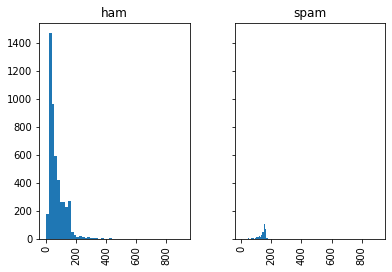

In [9]:
import matplotlib.pyplot as plt
data.hist(column='length',bins=50, by='type', sharex=True, sharey=True)
plt.show()

In [10]:
data.length.describe()

count    5559.000000
mean       79.781436
std        59.105497
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [11]:
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def clean_text(text):
    no_punc = [s for s in text if s not in string.punctuation]
    no_punc = ''.join(no_punc)
    rm_words = [w for w in no_punc.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)

In [12]:
clean_text('hello john!-;/.,<>? how are you.. @#$%^&*I am fine:')

'hello john fine'

In [13]:
data.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


In [14]:
data.text = data.text.apply(clean_text)

In [16]:
data.head()

,type,text,length
0,ham,Hope good week checking,49
1,ham,Kgive back thanks,23
2,ham,also cbe pay,43
3,spam,complimentary 4 STAR Ibiza Holiday £10000 cash...,149
4,spam,okmail Dear Dave final notice collect 4 Teneri...,161


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer()
bag_of_words.fit(data['text'])
len(bag_of_words.vocabulary_)

9385

In [16]:
txt_transform = bag_of_words.transform(data.text)
print(txt_transform.shape)
txt_transform

(5559, 9385)


<5559x9385 sparse matrix of type '<class 'numpy.int64'>'
	with 46993 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.naive_bayes import MultinomialNB 
mn = MultinomialNB()

In [18]:
mn.fit(txt_transform,data.type)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
new_sms = data.iloc[4][1]

In [20]:
new_sms

'okmail Dear Dave final notice collect 4 Tenerife Holiday 5000 CASH award Call 09061743806 landline TCs SAE Box326 CW25WX 150ppm'

In [21]:
def ham_spam(text):
    test = bag_of_words.transform([text])
    print(mn.predict(test))
    print(f'{mn.predict_proba(test)}')

In [22]:
ham_spam(new_sms)

['spam']
[[4.28005227e-19 1.00000000e+00]]


In [23]:
msg = 'Hi it\'s Amit here. practising here NLP.'

In [24]:
ham_spam(msg)

['ham']
[[0.98097661 0.01902339]]
